In [198]:
# !pip install --upgrade scipy

# Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

# Признаки:
1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

---



# Задание

Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department иsalary)

Оценить качество модели на тестовой выборки2010

Загрузить jupyter notebook с решение на github и прислать ссылку5

In [199]:
# ***************Блок модулей
# Общие модули
import pandas as pd
import numpy as np
import collections

# Графические
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline

# Статистические
from scipy import stats as st

In [200]:
# 1 Загрузите файл HR.csv в pandas dataframe5
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [201]:
df.info()

# Анализ пропусков в данных
# Пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [202]:
# 2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение). 10
# title_list = df.columns.tolist()
# print(*title_list, sep="\n")
df.describe()

# *************** Анализ данных *****************
# satisfaction_level >>> 
# last_evaluation >>> 
# number_project >>> 
# average_montly_hours >>> 
# time_spend_company >>> 
# Work_accident >>> 
# left >>> 
# promotion_last_5years >>> 
# department >>> 
# salary >>> 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


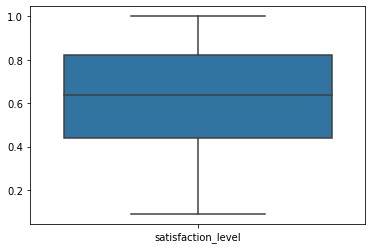

In [203]:
ax = sns.boxplot(data=df, 
                 order=['satisfaction_level'])

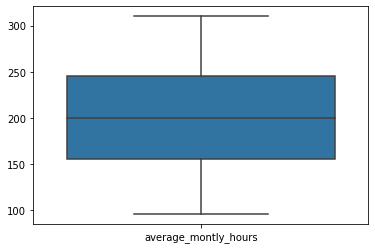

In [204]:
ax = sns.boxplot(data=df, 
                 order=['average_montly_hours'])


6     718
10    214
7     188
8     162
Name: time_spend_company, dtype: int64

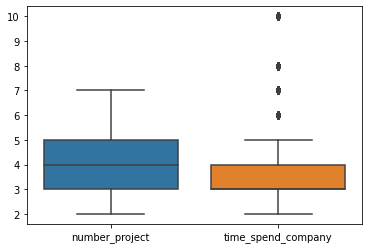

In [205]:
ax = sns.boxplot(data=df, 
                 order=['number_project', 'time_spend_company'])

df[df['time_spend_company'] > 5]['time_spend_company'].value_counts()

# Кажущиеся "выбросы" в "time_spend_company" таковыми не являются.

Work_accident  left  promotion_last_5years
0              0     0                        9200
               1     0                        3387
1              0     0                        1928
0              0     1                         228
1              1     0                         165
               0     1                          72
0              1     1                          15
1              1     1                           4
dtype: int64

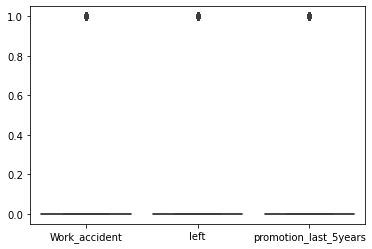

In [206]:
ax = sns.boxplot(data=df, 
                 order=['Work_accident', 'left', 'promotion_last_5years'])

df[['Work_accident', 'left', 'promotion_last_5years']].value_counts()
# 'Work_accident', 'left', 'promotion_last_5years' >>> бинарные столбцы, выбросов и пропусков нет

Text(0.5, 1.0, 'Корреляционная матрица для количественных переменных\n')

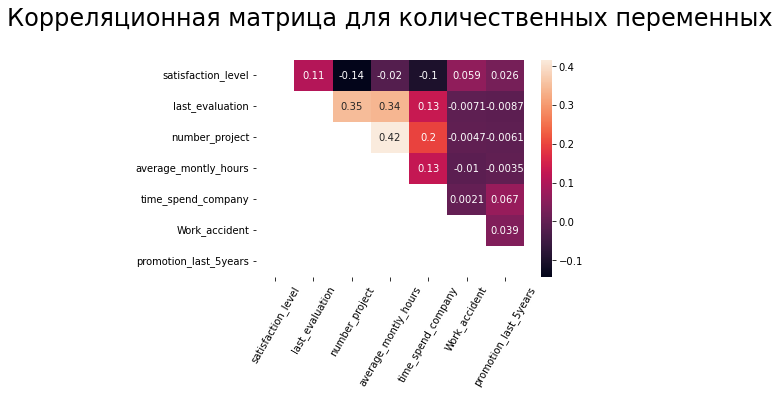

In [207]:
# 3 Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.10


mask = np.tril(df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].corr())
ax = sns.heatmap(df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].corr(), annot=True, mask=mask)
plt.xticks(rotation=60)
plt.title('Корреляционная матрица для количественных переменных\n', size=24)


In [208]:
table = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].corr().abs()

def get_redundant_pairs(df_):
    '''Получение корреляционных пар'''
    pairs_to_drop = set()
    cols = df_.columns
    for i in range(0, df_.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df_, n=5):
    au_corr = df_.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df_)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_bottom_abs_correlations(df_, n=5):
    au_corr = df_.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df_)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("\nПары с наибольшей абсолютной корреляцией:")
print(get_top_abs_correlations(table, 3))
print("\nПары с наименьшей абсолютной корреляцией:")
print(get_bottom_abs_correlations(table, 3))

print('\n\n****Корреляция в табличном виде с подсветкой****')
table
table.style.highlight_max(axis=0)
table.style.background_gradient(cmap='PuBu')


Пары с наибольшей абсолютной корреляцией:
number_project   average_montly_hours     0.536712
last_evaluation  average_montly_hours     0.414262
number_project   promotion_last_5years    0.410936
dtype: float64

Пары с наименьшей абсолютной корреляцией:
number_project        time_spend_company    0.022107
average_montly_hours  time_spend_company    0.082229
last_evaluation       time_spend_company    0.089952
dtype: float64


****Корреляция в табличном виде с подсветкой****


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,0.105021,0.142970,0.020048,0.100866,0.058697,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,0.007104,0.008684
number_project,0.142970,0.349333,1.000000,0.417211,0.196786,0.004741,0.006064
average_montly_hours,0.020048,0.339742,0.417211,1.000000,0.127755,0.010143,0.003544
time_spend_company,0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,0.058697,0.007104,0.004741,0.010143,0.002120,1.000000,0.039245
promotion_last_5years,0.025605,0.008684,0.006064,0.003544,0.067433,0.039245,1.000000


In [209]:
# 4 Рассчитайте сколько сотрудников работает в каждом департаменте. 5
df['__flag'] = 1 # ввожу для накопительных расчетов
df['left_names'] = ['Работают' if x == 1 else 'Уволены' for x in df['left']]
table = pd.pivot_table(df, values='__flag', index=['department'], columns=['left_names'], aggfunc=np.sum, fill_value=0)
print('Расчет количества сотрудников по департаментам:')
print('расчет произведен с учетом уволенных и работающих')
table

Расчет количества сотрудников по департаментам:
расчет произведен с учетом уволенных и работающих


left_names,Работают,Уволены
department,,
IT,273,954
RandD,121,666
accounting,204,563
hr,215,524
management,91,539
marketing,203,655
product_mng,198,704
sales,1014,3126
support,555,1674



***Распределение сотрудников по зарплатам***


low       7316
medium    6446
high      1237
Name: salary, dtype: int64

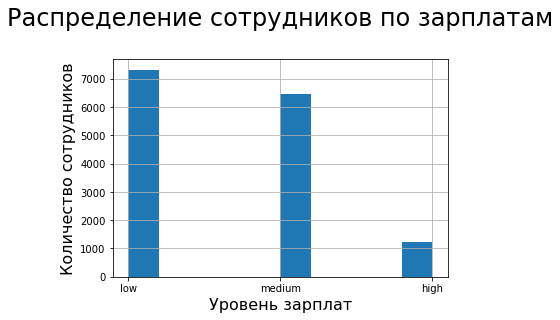

In [210]:
# 5 Показать распределение сотрудников по зарплатам.5

table = pd.pivot_table(df, values='__flag', index=['department'], columns=['left_names'], aggfunc=np.sum, fill_value=0)
df.salary.hist()
pl.title('Распределение сотрудников по зарплатам\n', size=24)
pl.xlabel('Уровень зарплат', size=16)
pl.ylabel('Количество сотрудников', size=16)

print('\n***Распределение сотрудников по зарплатам***')
salary_table = df['salary'].value_counts()
salary_table


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам в каждом департаменте по отдельности\n')

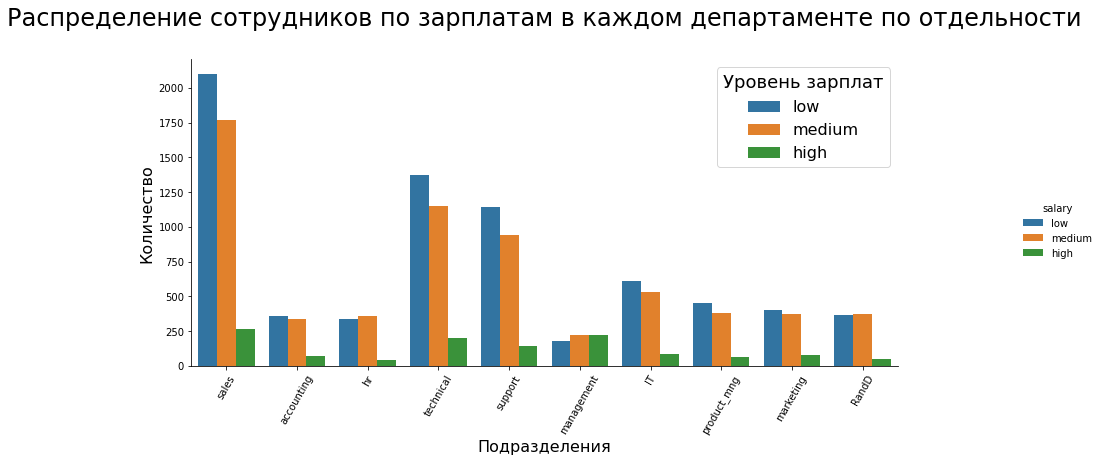

In [211]:
# 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности 5

ax = sns.catplot(data=df.reset_index(), x='department', hue='salary', kind='count')

ax.fig.set_size_inches(15,5)
plt.legend(title='Уровень зарплат', fontsize = 16, title_fontsize= 18)
plt.xticks(rotation=60)
plt.xlabel("Подразделения", size=16)
plt.ylabel("Количество", size=16)
plt.title('Распределение сотрудников по зарплатам в каждом департаменте по отдельности\n', size=24)

In [212]:
# 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, 
# чем сотрудники с низким окладом 10
 
# H0: среднее время, которое проводят на работе, сотрудники с высоким и низким уровнем зарплат ОДИНАКОВОЕ
# H1: среднее время, которое проводят на работе, сотрудники с высоким и низким уровнем зарплат РАЗЛИЧАЮТСЯ
alpha = 0.05

result_low_mean = df[df['salary']=='low']['average_montly_hours'].mean()
result_medium_mean = df[df['salary']=='medium']['average_montly_hours'].mean()
result_high_mean = df[df['salary']=='high']['average_montly_hours'].mean()

result = st.ttest_ind(df[df['salary']=='low']['average_montly_hours'], df[df['salary']=='high']['average_montly_hours'], equal_var=False)

print(f'{result_low_mean=}\n{result_medium_mean=}\n{result_high_mean=}\n')
print(f'{result= }\n')

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к продукции Apple и Samsung')
else:
    print('****Не отвергаем нулевую гипотезу****')

result_low_mean=200.9965828321487
result_medium_mean=201.33834936394663
result_high_mean=199.86742118027485

result= Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)

****Не отвергаем нулевую гипотезу****


Text(0, 0.5, 'Частота')

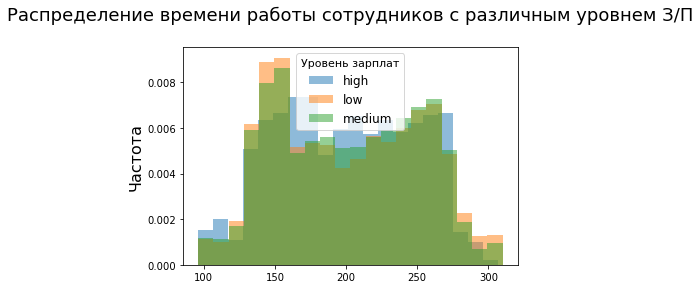

In [213]:
# Для наглядности - в подтвтерждение НЕ ОТВЕРЖЕНИЯ Н0
df.groupby('salary')['average_montly_hours'].plot(kind='hist', 
                        alpha = 0.5,
                        bins=20,
                     density = True)
plt.legend(title='Уровень зарплат', fontsize = 12, title_fontsize= 11)
plt.title('Распределение времени работы сотрудников с различным уровнем З/П\n', size=18)
plt.ylabel("Частота", size=16)

In [214]:
# 8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): 10
# ●Доля сотрудников с повышением за последние 5 лет
# ●Средняя степень удовлетворенности
# ●Среднее количество проектов 
df.reset_index()
promotion_last_5y = (df[df['promotion_last_5years'] == 1].count() / df['promotion_last_5years'].count())[0]
print(f'\nДоля сотрудников с повышением за последние 5 лет\n{promotion_last_5y = }\n')

satisfaction_level_mean = df['satisfaction_level'].mean()
print(f'\nСредняя степень удовлетворенности\n{satisfaction_level_mean = }')


number_project_mean = df['number_project'].mean()
print(f'\nСреднее количество проектов\n{number_project_mean = }')


Доля сотрудников с повышением за последние 5 лет
promotion_last_5y = 0.021268084538969265


Средняя степень удовлетворенности
satisfaction_level_mean = 0.6128335222348166

Среднее количество проектов
number_project_mean = 3.80305353690246


In [215]:
# 9 Разделить данные на тестовую и обучающую выборки

# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department иsalary)
# Оценить качество модели на тестовой выборки2010


# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
data = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
data_class = df['left']
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
print('Делаем прогноз на тестовой выборке')
lda_predict_X_test = lda.predict(X_test)
print(f'{lda_predict_X_test = }\n')
print('Счетчик полученных результатов')
print(f'{collections.Counter(lda_predict_X_test) = }\n')

# смотрим разницу факта и прогноза
print('Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)')
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
print('\nCмотрим разницу факта и прогноза\n', result)
print('\n***Для наглядности вывожу пары факта и прогноза:***')
print(f'{result.value_counts() = }\n')

from sklearn.metrics import accuracy_score
print('Оценить качество модели на тестовой выборки >>>')
print(f'{accuracy_score(y_test, lda.predict(X_test)) = }')
# Вывод для оптимизации модели нужно всеже, отсеить еще часть столбцов ... слишком много NaN
print('\n\nВывод для оптимизации модели нужно все же, отсеить еще часть столбцов ... слишком много NaN')

Делаем прогноз на тестовой выборке
lda_predict_X_test = array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Счетчик полученных результатов
collections.Counter(lda_predict_X_test) = Counter({0: 3332, 1: 418})

Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

Cмотрим разницу факта и прогноза
        left  Unnamed 0
5858    0.0        NaN
1666    1.0        0.0
1252    1.0        0.0
5222    0.0        NaN
7689    0.0        NaN
...     ...        ...
8460    0.0        NaN
11584   0.0        NaN
6497    0.0        NaN
8562    0.0        NaN
10808   0.0        NaN

[3750 rows x 2 columns]

***Для наглядности вывожу пары факта и прогноза:***
result.value_counts() = left  Unnamed 0
1.0   0.0          469
0.0   0.0          370
1.0   1.0           53
0.0   1.0           47
dtype: int64

Оценить качество модели на тестовой выборки >>>
accuracy_score(y_test, lda.predict(X_test)) = 0.7642666666666666


Вывод для оптимизации модели ну